 ## **2. Website Name: Flipkart.com**

#### **3. Problem Definition:** Analysis on Prices of the Products available in Flipkart TV.				

In [27]:
import numpy as np
import pandas as pd
import requests
import seaborn as sns

In [29]:
from bs4 import BeautifulSoup
import re

In [33]:
url='https://www.flipkart.com/search?q=TV&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off'
page=requests.get(url)
soup=BeautifulSoup(page.text)
for i in soup.find_all('div',class_='tUxRFH'):
    print(i.text)
    print("***"*20)

Add to CompareXIAOMI by Mi Fire Tv 80 cm (32 inch) HD Ready LED Smart Fire TV 2025 Edition with High-Definition Disp...4.394,539 Ratings & 6,401 ReviewsOperating System: FireTv OSHD Ready 1366 x 768 PixelsLaunch Year: 20251 year comprehensive warranty₹11,999₹24,99952% offLowest price since launchUpto ₹2,000 Off on Exchange
************************************************************
Add to CompareHisense 108 cm (43 inch) Full HD LED Smart Google TV with Dolby Audio, 30W Powerful Sound, HDR 10, Sup...4.22,538 Ratings & 483 ReviewsOperating System: Google TVFull HD 1920 x 1080 PixelsLaunch Year: 20241 Year Comprehensive Warranty₹19,499₹34,99944% offUpto ₹2,000 Off on ExchangeBank Offer
************************************************************
Add to CompareSamsung 80 cm (32 inch) HD Ready LED Smart Tizen TV 2025 Edition with Voice Assistance Remote Control ...4.31,00,066 Ratings & 6,269 ReviewsOperating System: TizenHD Ready 1366 x 768 PixelsLaunch Year: 20252 Year Warranty (1Year Sta

In [38]:
page=requests.get(url)
page

<Response [200]>

### **4. Extract the Data**

In [161]:
Product_Name=[]
Brand=[]
Price=[]
Rating=[]
Review_Count=[]
Launch = []
OS_Platform=[]
Resolution_Type=[]

for i in range(1,31):
    url=f"https://www.flipkart.com/search?q=TV&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&page={i}"
    page=requests.get(url)
    soup=BeautifulSoup(page.text)

    #for product_name
    for i in soup.find_all('div',class_='KzDlHZ'):
        Product_Name.append(i.text)

   
    #for price
    for i in soup.find_all('div',class_="tUxRFH"):
        p=i.find('div',class_='Nx9bqj _4b5DiR')
        if p:
            Price.append(p.text)
        else:
            Price.append(np.nan)


    #for Rating
    for i in soup.find_all('div',class_="tUxRFH"):
        r=i.find('div',class_='XQDdHH')
        if r:
            Rating.append(r.text)
        else:
            Rating.append(np.nan)

    for i in soup.find_all('div',class_="tUxRFH"):
        text = i.text
    
        #No_of_reviews
        r1 = re.findall(r"(\d[\d,]*)\s+Reviews",text)
        if r1:
            Review_Count.append(r1[0])
        else:
            Review_Count.append(np.nan) 

        #Brand
        br = re.findall(r"Add to Compare\s*([A-Za-z0-9]+)",text)
        if br:
            Brand.append(br[0])
        else:
            Brand.append(np.nan)


        #Launch_Year
        ly = re.findall(r"Launch Year[:\s]*([12]\d{3})",text)
        if ly:
            Launch.append(ly[0])
        else:
            Launch.append(np.nan)


        #for OS_Platform
        os=re.findall(r"Operating System:\s*(Android|Google TV|Linux|Coolita|WebOS|FireTv OS)",text)   
        if os:
            OS_Platform.append(os[0])
        else:
            OS_Platform.append(np.nan)

        #for resolution
        res= re.findall(r"\b(?:HD Ready|Full HD|Ultra HD(?: \(4K\))?)",text)     
        if res:
            Resolution_Type.append(res[0])
        else:
            Resolution_Type.append(np.nan)

In [163]:
dic={"Product_Name":Product_Name,"Brand":Brand,"Price":Price,"Rating":Rating,"Review_Count":Review_Count,"Launch":Launch,"OS_Platform":OS_Platform,"Resolution_Type":Resolution_Type}

In [165]:
print("Product_Name:", len(Product_Name))

Product_Name: 720


In [167]:
print("Brand:", len(Brand))

Brand: 720


In [169]:
print("Price:", len(Price))

Price: 720


In [171]:
print("Rating:", len(Rating))

Rating: 720


In [173]:
print("Launch :", len(Launch))

Launch : 720


In [175]:
print("OS_Platform:", len(OS_Platform))

OS_Platform: 720


In [177]:
print("Resolution_Type:", len(Resolution_Type))

Resolution_Type: 720


In [498]:
print("Review_Count:", len(Review_Count))

Review_Count: 720


### **5. Create a Data Frame**

In [501]:
df=pd.DataFrame(dic)

In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product_Name     720 non-null    object
 1   Brand            720 non-null    object
 2   Price            719 non-null    object
 3   Rating           663 non-null    object
 4   Review_Count     663 non-null    object
 5   Launch           720 non-null    object
 6   OS_Platform      580 non-null    object
 7   Resolution_Type  720 non-null    object
dtypes: object(8)
memory usage: 45.1+ KB


In [505]:
df

,Product_Name,Brand,Price,Rating,Review_Count,Launch,OS_Platform,Resolution_Type
0,Foxsky 80 cm (32 inch) QLED HD Ready Smart Goo...,Foxsky,"₹7,499",4.3,"1,045",2024,Google TV,HD Ready
1,Foxsky 80 cm (32 inch) HD Ready LED Smart Andr...,Foxsky,"₹6,999",4.1,"1,855",2023,Android,HD Ready
2,Samsung 80 cm (32 inch) HD Ready LED Smart Tiz...,Samsung,"₹11,990",4.3,"6,269",2025,NaN,HD Ready
3,LG AI TV UR7500 126 cm (50 inch) Ultra HD (4K)...,LG,"₹36,990",4.4,"1,690",2025,WebOS,Ultra HD (4K)
4,XIAOMI by Mi Fire Tv 80 cm (32 inch) HD Ready ...,XIAOMI,"₹11,999",4.3,"6,401",2025,FireTv OS,HD Ready
...,...,...,...,...,...,...,...,...
715,Samsung UHD 8 Series 108 cm (43 inch) Ultra HD...,Samsung,"₹37,990",4.4,4,2020,Linux,Ultra HD (4K)
716,LG AI TV UA8200 139 cm (55 inch) Ultra HD (4K)...,LG,"₹43,990",4.4,"1,690",2025,WebOS,Ultra HD (4K)
717,LG AI TV UA8200 126 cm (50 inch) Ultra HD (4K)...,LG,"₹37,990",4.4,"1,690",2025,WebOS,Ultra HD (4K)
718,Hisense A6H 189 cm (75 inch) Ultra HD (4K) LED...,Hisense,"₹99,999",4.3,"1,299",2022,Google TV,Ultra HD (4K)


In [507]:
# Extract screen size in inches
df['Inches'] = df['Product_Name'].str.extract(r'(\d{2,3})\s*inch')

# Drop the original Product_Name column
df.drop(columns=['Product_Name'], inplace=True)

In [509]:
df.columns

Index(['Brand', 'Price', 'Rating', 'Review_Count', 'Launch', 'OS_Platform',
       'Resolution_Type', 'Inches'],
      dtype='object')

In [511]:
#arrange the column
df = df[['Brand','OS_Platform','Resolution_Type','Inches','Launch','Price','Review_Count',
             'Rating']]

In [513]:
df

,Brand,OS_Platform,Resolution_Type,Inches,Launch,Price,Review_Count,Rating
0,Foxsky,Google TV,HD Ready,32,2024,"₹7,499","1,045",4.3
1,Foxsky,Android,HD Ready,32,2023,"₹6,999","1,855",4.1
2,Samsung,NaN,HD Ready,32,2025,"₹11,990","6,269",4.3
3,LG,WebOS,Ultra HD (4K),50,2025,"₹36,990","1,690",4.4
4,XIAOMI,FireTv OS,HD Ready,32,2025,"₹11,999","6,401",4.3
...,...,...,...,...,...,...,...,...
715,Samsung,Linux,Ultra HD (4K),43,2020,"₹37,990",4,4.4
716,LG,WebOS,Ultra HD (4K),55,2025,"₹43,990","1,690",4.4
717,LG,WebOS,Ultra HD (4K),50,2025,"₹37,990","1,690",4.4
718,Hisense,Google TV,Ultra HD (4K),75,2022,"₹99,999","1,299",4.3


### **6. Export into .csv format**

In [682]:
df.to_csv('Flipkart_TVs.csv', index=False)

### **7. Read CSV File**

In [685]:
df=pd.read_csv('Flipkart_TVs.csv')

In [687]:
df

,Brand,OS_Platform,Resolution_Type,Inches,Launch_Year,Price,Review_Count,Rating
0,Foxsky,Google TV,HD Ready,32.0,2024,7499,1045,4.3
1,Foxsky,Android,HD Ready,32.0,2023,6999,1855,4.1
2,Samsung,Google TV,HD Ready,32.0,2025,11990,6269,4.3
3,LG,WebOS,Ultra HD (4K),50.0,2025,36990,1690,4.4
4,XIAOMI,FireTv OS,HD Ready,32.0,2025,11999,6401,4.3
...,...,...,...,...,...,...,...,...
715,Samsung,Linux,Ultra HD (4K),43.0,2020,37990,4,4.4
716,LG,WebOS,Ultra HD (4K),55.0,2025,43990,1690,4.4
717,LG,WebOS,Ultra HD (4K),50.0,2025,37990,1690,4.4
718,Hisense,Google TV,Ultra HD (4K),75.0,2022,99999,1299,4.3


- #### How many features(Columns) do you have?

In [523]:

print("Number of columns(Features) :", df.shape[1])


Number of columns(Features) : 8


- #### How many observations(rows) do you have?

In [526]:
print("Number of rows (observations) :", df.shape[0])

Number of rows (observations) : 720


- #### What is the data type of each feature(Columns)?

In [529]:
print("Data types : ")
print(df.dtypes)

Data types : 
Brand               object
OS_Platform         object
Resolution_Type     object
Inches             float64
Launch               int64
Price               object
Review_Count        object
Rating             float64
dtype: object


In [531]:
print("Missing values : ")
print(df.isnull().sum())

Missing values : 
Brand                0
OS_Platform        140
Resolution_Type      0
Inches               6
Launch               0
Price                1
Review_Count        57
Rating              57
dtype: int64


### **8. Clean the Data :**

In [534]:
#Removing the special characters
df['Price'] = df['Price'].astype(str).str.replace('₹', '').str.replace(',', '')
df['Review_Count'] = df['Review_Count'].astype(str).str.replace(',', '')

In [536]:
df

,Brand,OS_Platform,Resolution_Type,Inches,Launch,Price,Review_Count,Rating
0,Foxsky,Google TV,HD Ready,32.0,2024,7499,1045,4.3
1,Foxsky,Android,HD Ready,32.0,2023,6999,1855,4.1
2,Samsung,NaN,HD Ready,32.0,2025,11990,6269,4.3
3,LG,WebOS,Ultra HD (4K),50.0,2025,36990,1690,4.4
4,XIAOMI,FireTv OS,HD Ready,32.0,2025,11999,6401,4.3
...,...,...,...,...,...,...,...,...
715,Samsung,Linux,Ultra HD (4K),43.0,2020,37990,4,4.4
716,LG,WebOS,Ultra HD (4K),55.0,2025,43990,1690,4.4
717,LG,WebOS,Ultra HD (4K),50.0,2025,37990,1690,4.4
718,Hisense,Google TV,Ultra HD (4K),75.0,2022,99999,1299,4.3


In [538]:
#Headers
df.rename(columns={
    'Launch': 'Launch_Year',
}, inplace=True)

In [540]:
df

,Brand,OS_Platform,Resolution_Type,Inches,Launch_Year,Price,Review_Count,Rating
0,Foxsky,Google TV,HD Ready,32.0,2024,7499,1045,4.3
1,Foxsky,Android,HD Ready,32.0,2023,6999,1855,4.1
2,Samsung,NaN,HD Ready,32.0,2025,11990,6269,4.3
3,LG,WebOS,Ultra HD (4K),50.0,2025,36990,1690,4.4
4,XIAOMI,FireTv OS,HD Ready,32.0,2025,11999,6401,4.3
...,...,...,...,...,...,...,...,...
715,Samsung,Linux,Ultra HD (4K),43.0,2020,37990,4,4.4
716,LG,WebOS,Ultra HD (4K),55.0,2025,43990,1690,4.4
717,LG,WebOS,Ultra HD (4K),50.0,2025,37990,1690,4.4
718,Hisense,Google TV,Ultra HD (4K),75.0,2022,99999,1299,4.3


In [541]:
#convert the dtype
print(df.dtypes)

Brand               object
OS_Platform         object
Resolution_Type     object
Inches             float64
Launch_Year          int64
Price               object
Review_Count        object
Rating             float64
dtype: object


In [542]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price'] = df['Price'].astype('Int64')
df['Review_Count'] = pd.to_numeric(df['Review_Count'], errors='coerce')
df['Review_Count'] = df['Review_Count'].astype('Int64')

In [543]:
df

,Brand,OS_Platform,Resolution_Type,Inches,Launch_Year,Price,Review_Count,Rating
0,Foxsky,Google TV,HD Ready,32.0,2024,7499,1045,4.3
1,Foxsky,Android,HD Ready,32.0,2023,6999,1855,4.1
2,Samsung,NaN,HD Ready,32.0,2025,11990,6269,4.3
3,LG,WebOS,Ultra HD (4K),50.0,2025,36990,1690,4.4
4,XIAOMI,FireTv OS,HD Ready,32.0,2025,11999,6401,4.3
...,...,...,...,...,...,...,...,...
715,Samsung,Linux,Ultra HD (4K),43.0,2020,37990,4,4.4
716,LG,WebOS,Ultra HD (4K),55.0,2025,43990,1690,4.4
717,LG,WebOS,Ultra HD (4K),50.0,2025,37990,1690,4.4
718,Hisense,Google TV,Ultra HD (4K),75.0,2022,99999,1299,4.3


In [544]:
df.dtypes

Brand               object
OS_Platform         object
Resolution_Type     object
Inches             float64
Launch_Year          int64
Price                Int64
Review_Count         Int64
Rating             float64
dtype: object

In [550]:
#Handle Missing Values
print(df.isnull().sum())

Brand                0
OS_Platform        140
Resolution_Type      0
Inches               6
Launch_Year          0
Price                1
Review_Count        57
Rating              57
dtype: int64


In [552]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Price'] = df['Price'].fillna(df['Price'].median())
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df['Resolution_Type'] = df['Resolution_Type'].fillna('Not Specified')
df['Review_Count'] = df['Review_Count'].fillna(round(df['Review_Count'].mean()))
df['OS_Platform'] = df['OS_Platform'].fillna(df['OS_Platform'].mode()[0])
df['Inches'] = df['Inches'].fillna(df['Inches'].median())

In [554]:
print(df.isnull().sum())

Brand              0
OS_Platform        0
Resolution_Type    0
Inches             0
Launch_Year        0
Price              0
Review_Count       0
Rating             0
dtype: int64


In [556]:
df

,Brand,OS_Platform,Resolution_Type,Inches,Launch_Year,Price,Review_Count,Rating
0,Foxsky,Google TV,HD Ready,32.0,2024,7499,1045,4.3
1,Foxsky,Android,HD Ready,32.0,2023,6999,1855,4.1
2,Samsung,Google TV,HD Ready,32.0,2025,11990,6269,4.3
3,LG,WebOS,Ultra HD (4K),50.0,2025,36990,1690,4.4
4,XIAOMI,FireTv OS,HD Ready,32.0,2025,11999,6401,4.3
...,...,...,...,...,...,...,...,...
715,Samsung,Linux,Ultra HD (4K),43.0,2020,37990,4,4.4
716,LG,WebOS,Ultra HD (4K),55.0,2025,43990,1690,4.4
717,LG,WebOS,Ultra HD (4K),50.0,2025,37990,1690,4.4
718,Hisense,Google TV,Ultra HD (4K),75.0,2022,99999,1299,4.3


In [558]:
#Identifying and treating the Outliers (Based on the Problem Statement or Data)
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

In [560]:
Q1

14499.0

In [562]:
Q3

43990.0

In [564]:
IQR

29491.0

In [566]:
Lower_Bound = Q1 - 1.5 * IQR
Upper_Bound = Q3 + 1.5 * IQR

In [568]:
print("Lower Bound :",Lower_Bound)

Lower Bound : -29737.5


In [570]:
print("Upper Bound :",Upper_Bound)

Upper Bound : 88226.5


In [572]:
df[(df['Price'] >= Lower_Bound) & (df['Price'] <= Upper_Bound)]

,Brand,OS_Platform,Resolution_Type,Inches,Launch_Year,Price,Review_Count,Rating
0,Foxsky,Google TV,HD Ready,32.0,2024,7499,1045,4.3
1,Foxsky,Android,HD Ready,32.0,2023,6999,1855,4.1
2,Samsung,Google TV,HD Ready,32.0,2025,11990,6269,4.3
3,LG,WebOS,Ultra HD (4K),50.0,2025,36990,1690,4.4
4,XIAOMI,FireTv OS,HD Ready,32.0,2025,11999,6401,4.3
...,...,...,...,...,...,...,...,...
713,Infinix,Android,Ultra HD (4K),50.0,2022,29999,218,4.2
715,Samsung,Linux,Ultra HD (4K),43.0,2020,37990,4,4.4
716,LG,WebOS,Ultra HD (4K),55.0,2025,43990,1690,4.4
717,LG,WebOS,Ultra HD (4K),50.0,2025,37990,1690,4.4


### **9. Data Analysis and Visualization (EDA) : # Problem statement : EDA , ratings and gross income : these two features with all other available features : draw some of the conclusions** 
#### **As we can see there two data types in Statistics**
#### 1. Categorical :
1. Brand
2. OS_Platform
3. Resolution_Type
#### 2. Numerical Data (Continuous Data and Discrete Data): 
1. Price (Continuous)
2. Rating (Continuous)
3. Inches (Continues)
4. Launch_Year
5. Review_Count (Discrete)

###  **Uni-variate Analysis:**
### 1. Continuous Variables

In [577]:
import matplotlib.pyplot as plt
import seaborn as sns

In [579]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 2. Categorical

In [583]:
import matplotlib.pyplot as plt
import seaborn as sns

In [585]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

- #### Brand

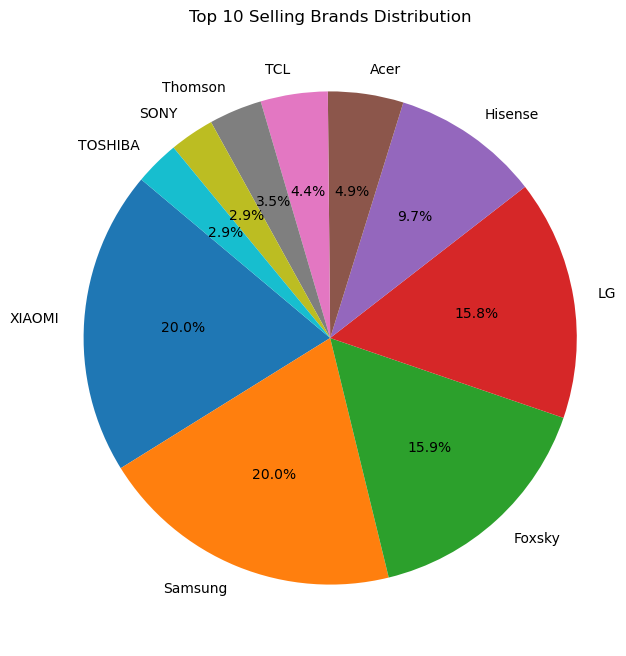

In [589]:
# Get counts of top 10 brands
top_10_brands = df['Brand'].value_counts().nlargest(10)
plt.figure(figsize=(7,8))
plt.pie(top_10_brands.values,labels=top_10_brands.index,autopct='%1.1f%%',startangle=140)
plt.title('Top 10 Selling Brands Distribution')
plt.axis('equal')  
plt.show()

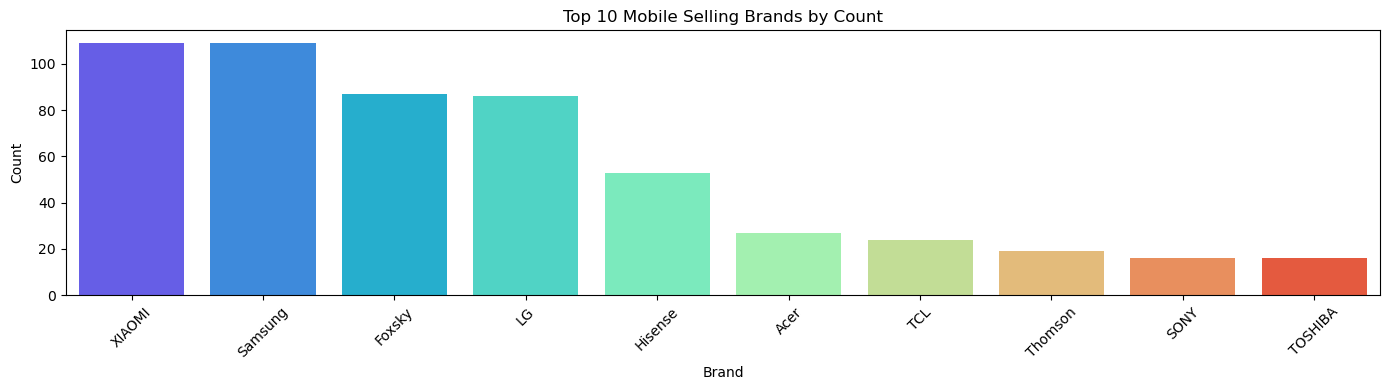

In [590]:
# Count Plot for brand
plt.figure(figsize=(14,4))
top_selling_brands= df['Brand'].value_counts().nlargest(10).index
sns.countplot(data=df, x='Brand', order=top_selling_brands,palette='rainbow')

plt.title('Top 10 Mobile Selling Brands by Count')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- #### OS_Platform

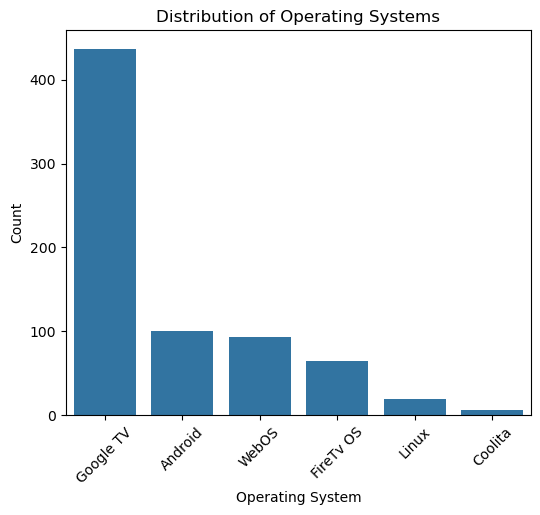

In [594]:
os_counts = df['OS_Platform'].value_counts().reset_index()
os_counts.columns = ['OS_Platform', 'Count']

plt.figure(figsize=(6,5))
sns.barplot(x='OS_Platform', y='Count', data=os_counts, order=os_counts['OS_Platform'])
plt.title('Distribution of Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- #### Resolution

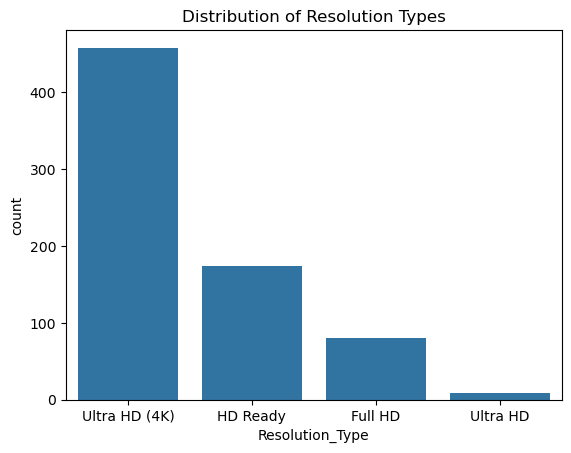

In [597]:
sns.countplot(x='Resolution_Type', data=df, order=df['Resolution_Type'].value_counts().index)
plt.title('Distribution of Resolution Types')
plt.show()

### 2. Numerical Features

In [600]:
for col in ['Price', 'Rating','Inches','Launch_Year','Review_Count']:
    print(f"--- {col} ---")
    print("Mean:", df[col].mean())
    print("Median:", df[col].median())
    print("Mode:", df[col].mode()[0])
    print("Standard Deviation:", df[col].std())
    print("Variance:", df[col].var())
    print("Min:", df[col].min())
    print("Max:", df[col].max())
    print("IQR:", df[col].quantile(0.75) - df[col].quantile(0.25))
    print("-"*50)

--- Price ---
Mean: 44210.59861111111
Median: 29990.0
Mode: 11999
Standard Deviation: 57994.830915540326
Variance: 3363400412.922112
Min: 4499
Max: 486509
IQR: 29491.0
--------------------------------------------------
--- Rating ---
Mean: 4.20875
Median: 4.2
Mode: 4.3
Standard Deviation: 0.2533087716541617
Variance: 0.06416533379694024
Min: 1.0
Max: 5.0
IQR: 0.20000000000000018
--------------------------------------------------
--- Inches ---
Mean: 48.30833333333333
Median: 50.0
Mode: 55.0
Standard Deviation: 13.312524037341094
Variance: 177.22329624478442
Min: 24.0
Max: 100.0
IQR: 15.0
--------------------------------------------------
--- Launch_Year ---
Mean: 2023.7333333333333
Median: 2024.0
Mode: 2025
Standard Deviation: 1.4911887707230334
Variance: 2.2236439499304717
Min: 2016
Max: 2025
IQR: 2.0
--------------------------------------------------
--- Review_Count ---
Mean: 1564.6125
Median: 893.5
Mode: 141
Standard Deviation: 2470.2103261617935
Variance: 6101939.055476355
Min: 0


In [602]:
#visualization
#continues data

- #### Price

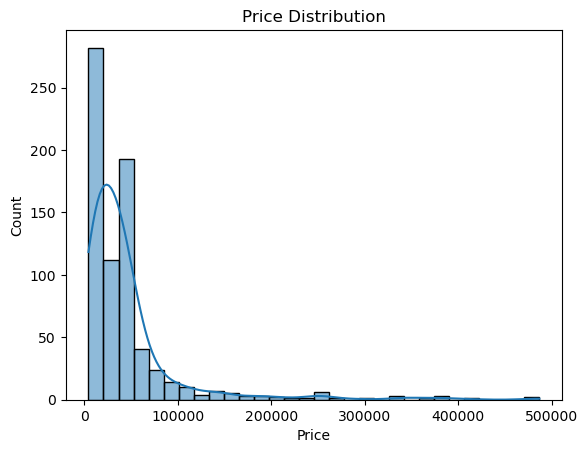

In [605]:
#histogram for price
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Price Distribution")
plt.show()

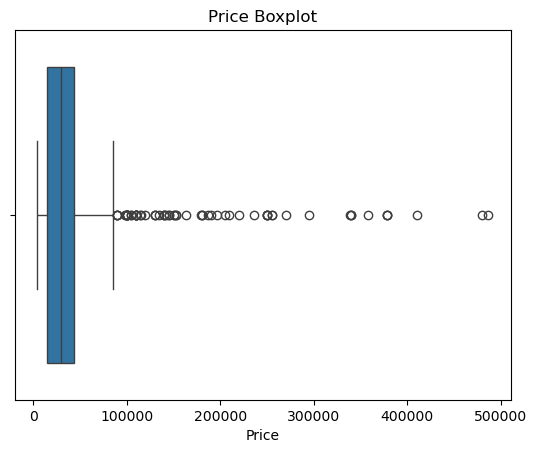

In [606]:
#box plot for price
sns.boxplot(x=df['Price'])
plt.title("Price Boxplot")
plt.show()

- #### Rating

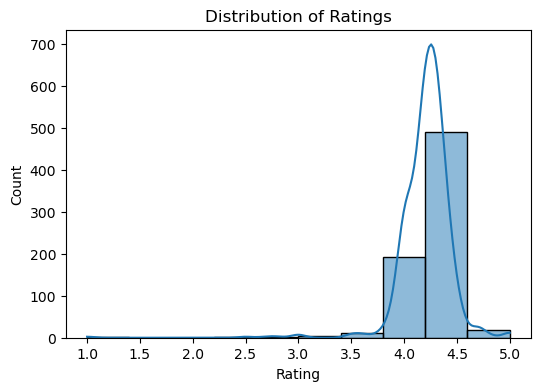

In [610]:
# Histogram for Rating
plt.figure(figsize=(6, 4))
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

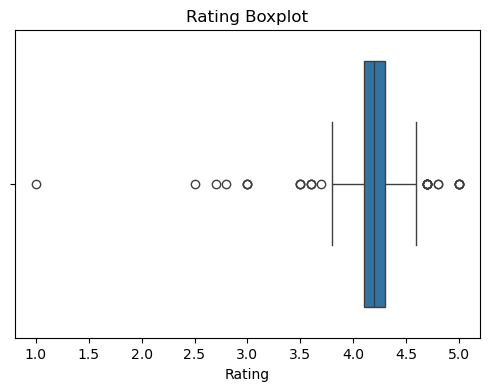

In [611]:
#box plot for rating
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Rating'])
plt.title("Rating Boxplot")
plt.show()

- #### Inches

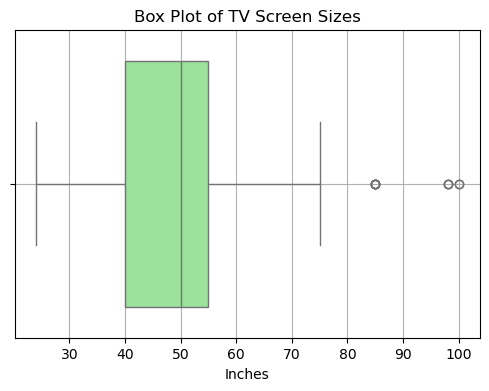

In [615]:
# Box Plot (to visualize spread, outliers)
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Inches'], color='lightgreen')
plt.title("Box Plot of TV Screen Sizes")
plt.xlabel("Inches")
plt.grid(True)
plt.show()

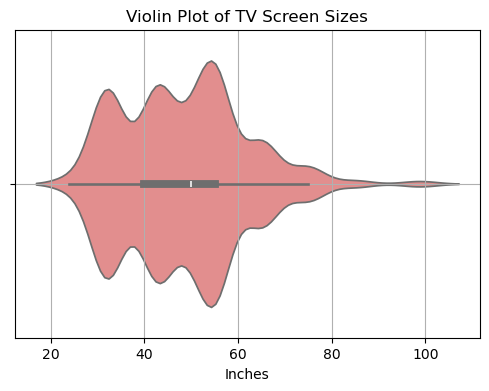

In [616]:
#Violin Plot (distribution + density)
plt.figure(figsize=(6, 4))
sns.violinplot(x=df['Inches'], color='lightcoral')
plt.title("Violin Plot of TV Screen Sizes")
plt.xlabel("Inches")
plt.grid(True)
plt.show()

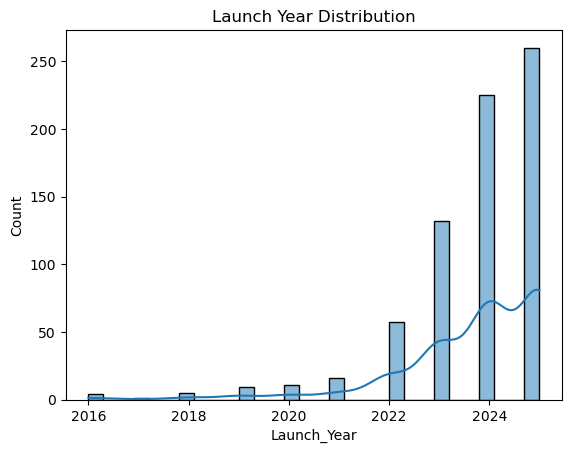

In [617]:
# Histogram for launch_Year
sns.histplot(df['Launch_Year'], bins=30, kde=True)
plt.title("Launch Year Distribution")
plt.show()

In [622]:
#discrete data

- ### Review_Count

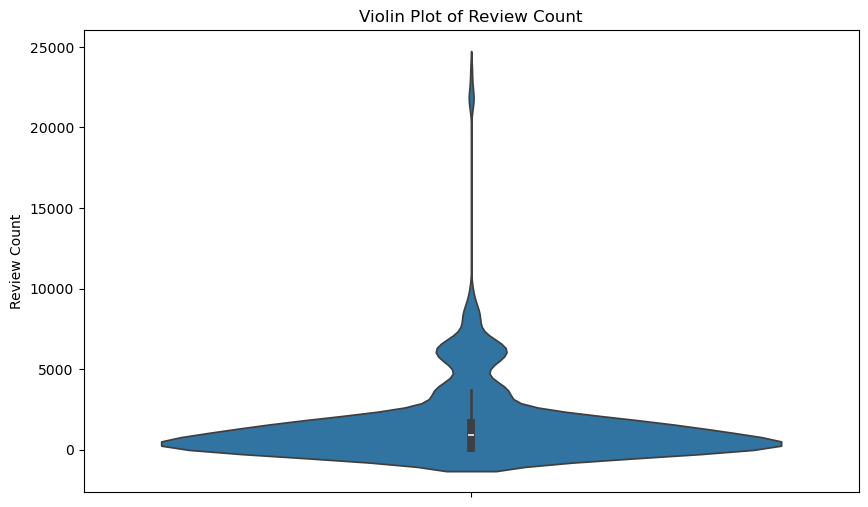

In [625]:
plt.figure(figsize=(10,6))
sns.violinplot(y=df['Review_Count'])
plt.title('Violin Plot of Review Count')
plt.ylabel('Review Count')
plt.show()

 ### **Bi-variate Analysis/Multivariate :**

- ### Continuous  and Categorical variables (groupby, pivot table)

#### Brand vs Price

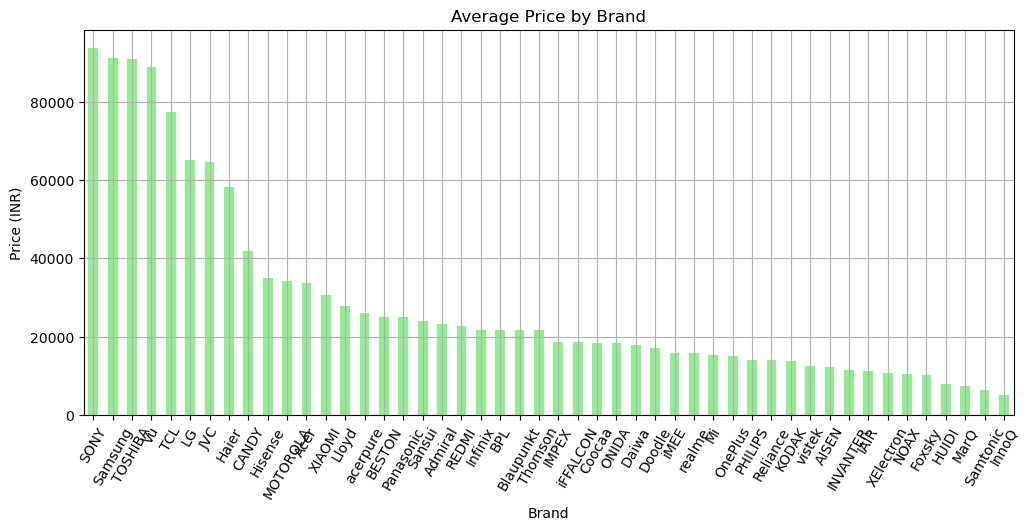

In [630]:
# GroupBy: Brand vs Avg Price
avg_price = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 5))
avg_price.plot(kind='bar', color='lightgreen')
plt.title("Average Price by Brand")
plt.ylabel("Price (INR)")
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

#### Rating vs Brand

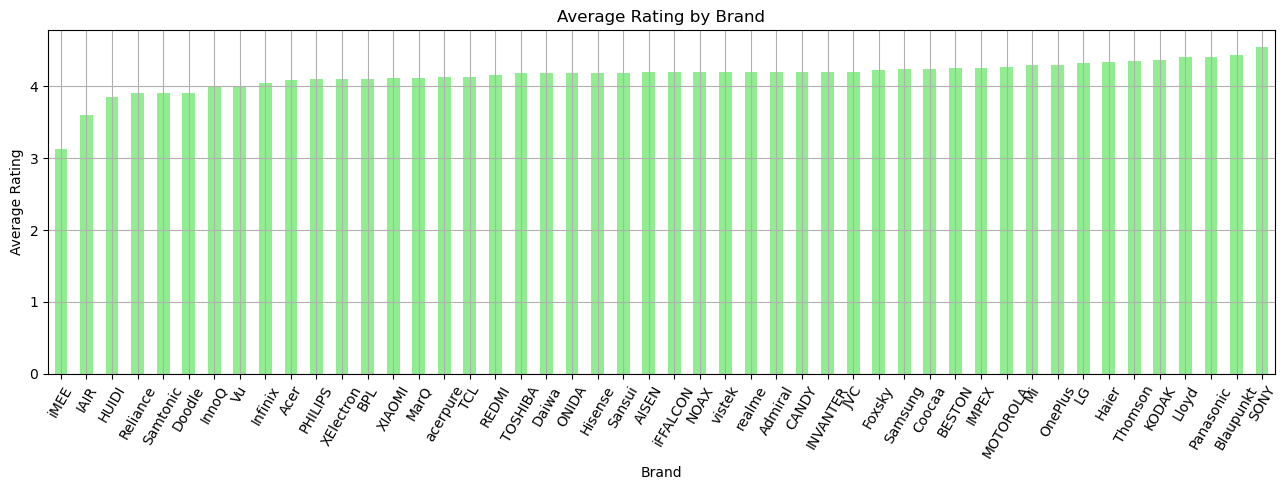

In [632]:
# Group by Brand to get average rating
avg_rating_by_brand = df.groupby('Brand')['Rating'].mean().sort_values()

# Plot the average rating by brand
plt.figure(figsize=(13, 5))
avg_rating_by_brand.plot(kind='bar', color='lightgreen')
plt.title("Average Rating by Brand")
plt.ylabel("Average Rating")
plt.xlabel("Brand")
plt.xticks(rotation=60)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Price vs OS_Platform

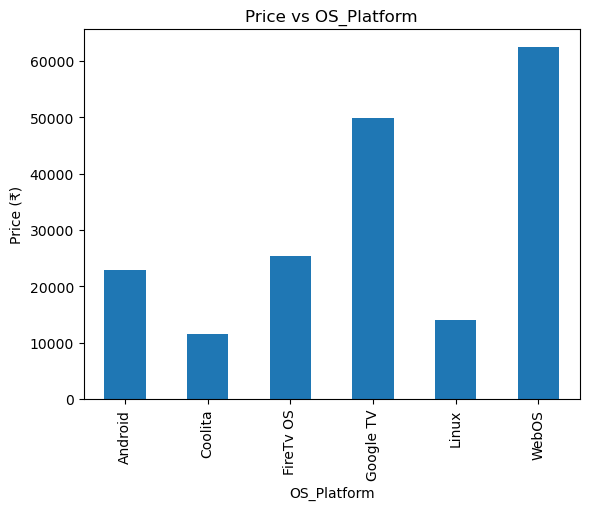

In [635]:
df.groupby('OS_Platform')['Price'].mean().plot(kind='bar')
plt.title('Price vs OS_Platform')
plt.ylabel('Price (₹)')
plt.show()

#### Rating vs Price

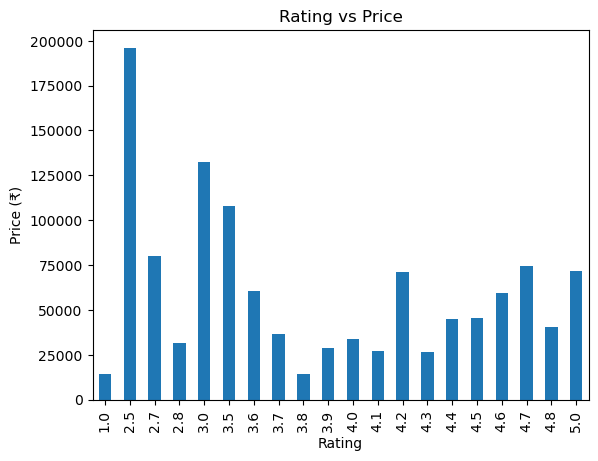

In [639]:
df.groupby('Rating')['Price'].mean().plot(kind='bar')
plt.title('Rating vs Price')
plt.ylabel('Price (₹)')
plt.show()

#### Launch Year vs Price

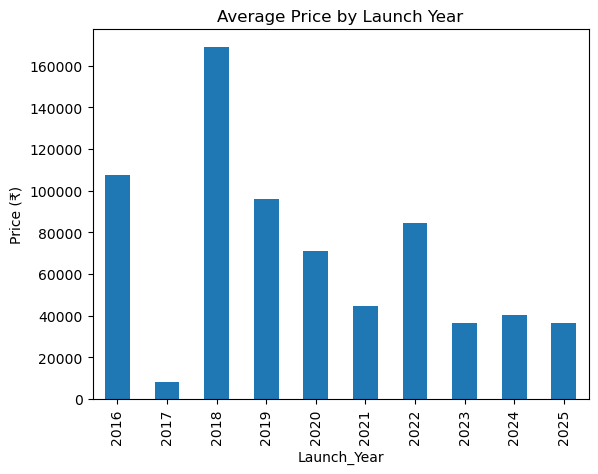

In [642]:
df.groupby('Launch_Year')['Price'].mean().plot(kind='bar')
plt.title('Average Price by Launch Year')
plt.ylabel('Price (₹)')
plt.show()

#### Continuous to Continuous variable  (correlation plot)

- #### Correlation Heatmap

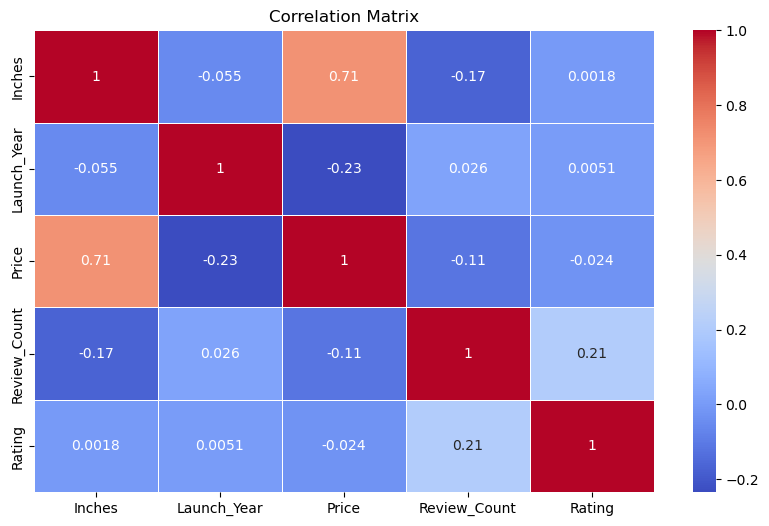

In [646]:
# Correlation Heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

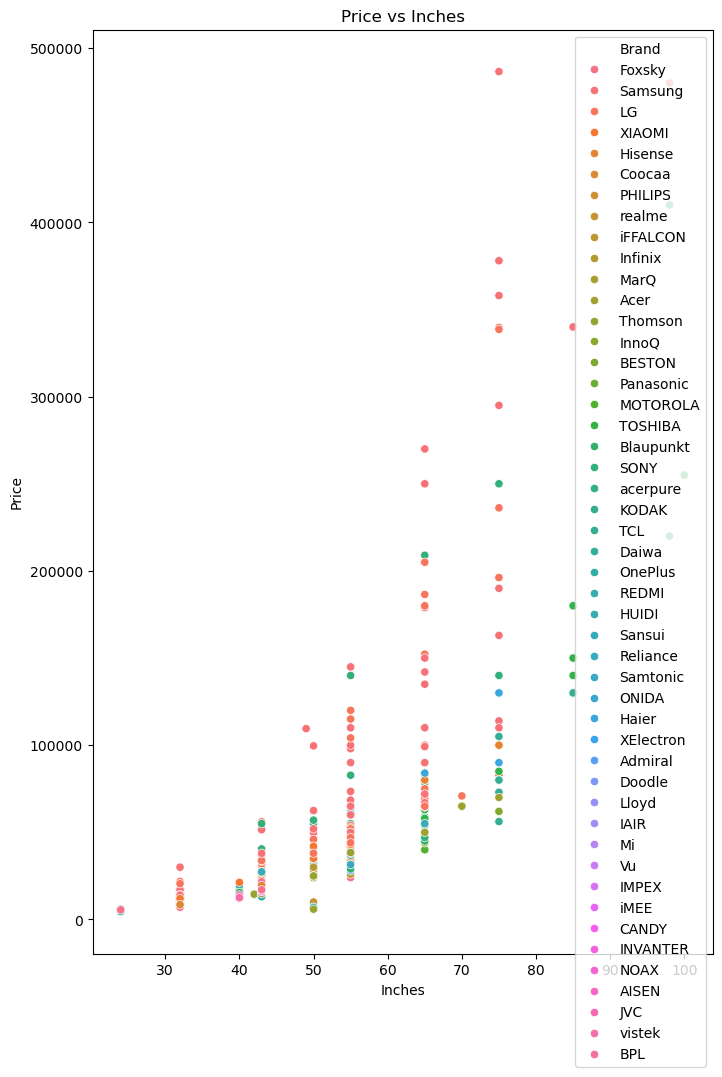

In [647]:
# Scatter plot: Price vs Inches
plt.figure(figsize=(8, 12))
sns.scatterplot(data=df, x='Inches', y='Price', hue='Brand')
plt.title("Price vs Inches")
plt.xlabel("Inches")
plt.ylabel("Price")
plt.show()

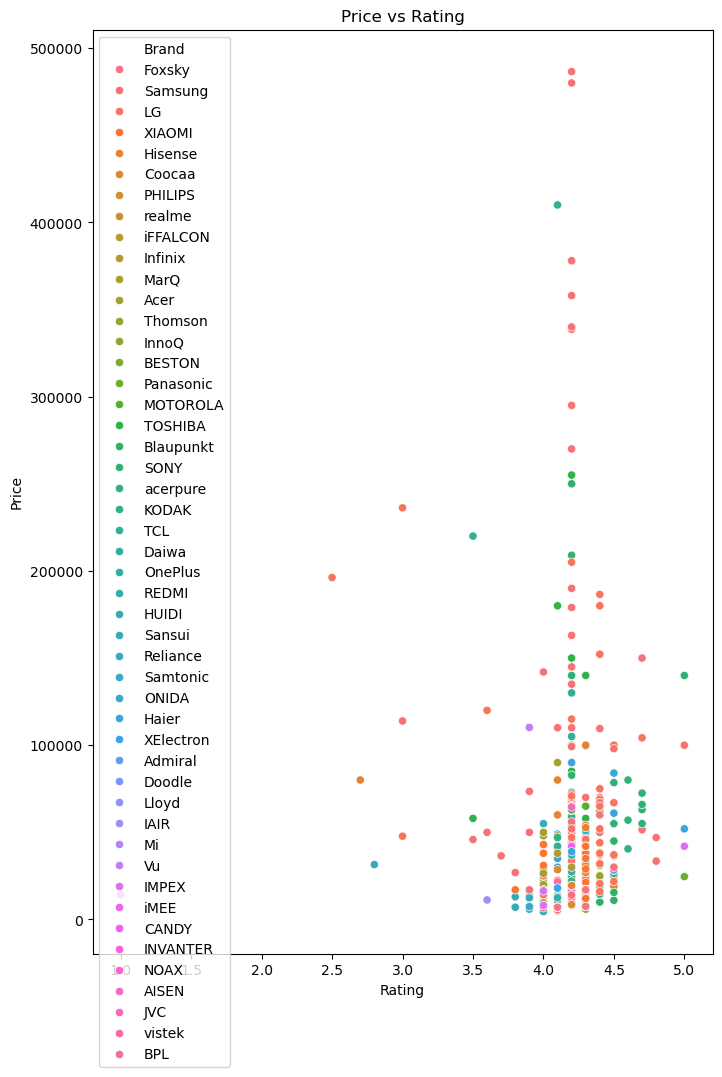

In [649]:
#Price vs rating
plt.figure(figsize=(8, 12))
sns.scatterplot(data=df, x='Rating', y='Price', hue='Brand')
plt.title("Price vs Rating")
plt.xlabel("Rating")
plt.ylabel("Price")
plt.show()

#### Categorical to Categorical variables (crosstab) 

#### Resolution_Type vs OS_Platform

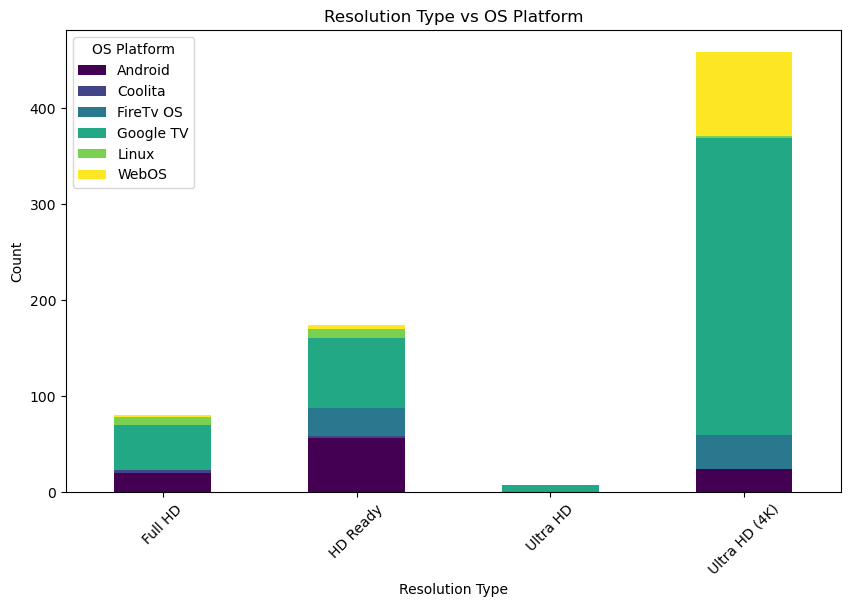

In [652]:
cross_os_res = pd.crosstab(df['Resolution_Type'], df['OS_Platform'])

# Stacked Bar Plot
cross_os_res.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title('Resolution Type vs OS Platform')
plt.xlabel('Resolution Type')
plt.ylabel('Count')
plt.legend(title='OS Platform')
plt.xticks(rotation=45)
plt.show()

#### Brand vs OS_Platform

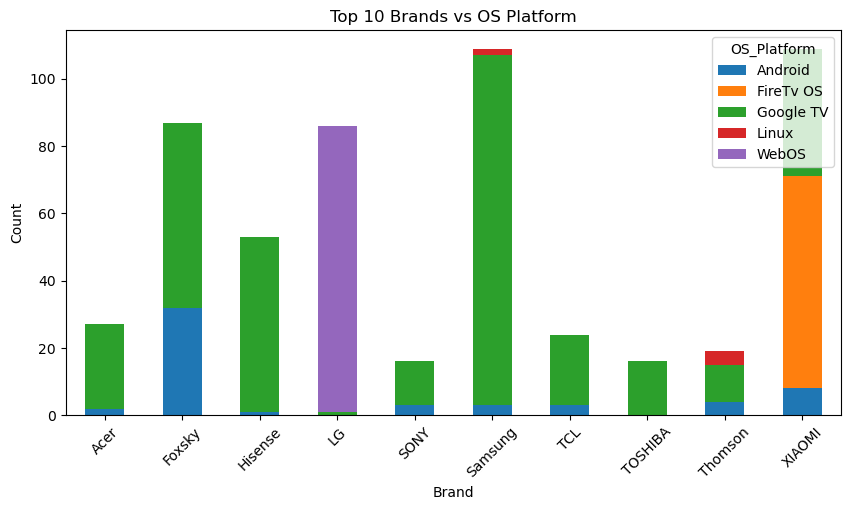

In [655]:
top_brands = df['Brand'].value_counts().head(10).index
top_df = df[df['Brand'].isin(top_brands)]

pd.crosstab(top_df['Brand'], top_df['OS_Platform']).plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Top 10 Brands vs OS Platform')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### **Observations**

# Uni-variate Analysis:

## Categorical

#### 1) Pie Chart: Top 10 Selling Brands Distribution
- ##### Xiaomi and Samsung are the top-selling brands with equal share (20% each).
- ##### Foxsky and LG are also strong performers with around 16% share each.
- ##### Hisense holds a moderate share of nearly 10%.
- ##### Acer has a smaller share of about 5%.
- ##### TCL, Thomson, Sony, and Toshiba have the least share, each under 5%.
- ##### This chart shows which brands are most popular in terms of sales distribution.

#### 2) Count Plot: Top 10 Mobile Selling Brands
- ##### XIAOMI and Samsung are the top-selling mobile brands with the highest counts.
- ##### Foxsky and LG are also popular, but with slightly lower counts.
- ##### Hisense, Acer, and TCL have moderate to low sales.
- ##### Thomson, SONY, and TOSHIBA have the least number of models listed.

#### 3) Bar Plot: Distribution of Operating Systems
- ##### Google TV is the most used operating system by a large margin.
- ##### Android and WebOS are the next most common platforms.
- ##### FireTV OS and Linux are used much less.
- ##### Coastal has the lowest usage among all the OS platforms.


#### 4) Count Plot: Distribution of Resolution Types
- ##### HD and Full HD are the most common resolution types.
- ##### 4K Ultra HD is also popular, but less than HD types.
- ##### Other resolutions like HD Ready and Ultra HD (4K) are less common.
- ##### Most TVs have good to high display quality.

## Numerical Features

#### 1) Histogram: Price Distribution
- ##### Most TVs are in the low-price range.
- ##### Fewer TVs are available at high prices.
- ##### The chart is right-skewed, meaning some TVs are very expensive.
- ##### The curve shows that budget-friendly TVs are more common.

#### 2) Box Plot: Price
- ##### Most TVs cost less or are mid-range in price.
- ##### The box shows the usual price range for most TVs.
- ##### A few TVs are very costly, and they are shown as dots on the right.
- ##### The prices are mostly low, but some are much higher.

#### 3 ) Histogram: Distribution of Ratings
- ##### Most TVs have ratings between 3.5 and 4.5.
- ##### Ratings around 4 are the most common.
- ##### Very few TVs have low ratings (below 3).
- ##### Overall, most TVs are well-rated.

#### 4) Box Plot: Rating
- ##### Most TVs have ratings in the range of 3.5 to 4.5.
- ##### The common rating falls around 4.
- ##### Few TVs have low ratings, and very few are rated below 3.
- ##### The ratings are mostly high, showing positive customer reviews.

#### 5) Box Plot: TV Screen Sizes (Inches) 
- ##### Most TVs have screen sizes between 32 and 55 inches.
- ##### The common screen size is around 43 inches.
- ##### The box shows the middle range of screen sizes.
- ##### Some TVs have very large screens, shown as outlier points on the right side.

#### 6) Violin Plot: TV Screen Sizes (Inches)
- ##### Most TVs have screen sizes between 32 and 55 inches.
- ##### The bulge in the center shows that 43 inches is the most common size.
- ##### The plot shows both spread and density of screen sizes.
- ##### Very large TVs are rare and appear in the narrow ends of the plot.

#### 7) Histogram: Launch Year Distribution
- ##### Most TVs were launched after 2020.
- ##### The highest number of TVs were launched in 2022.
- ##### Very few TVs were launched before 2017.
- ##### This shows that newer models are more common in the data.

#### 8) Violin Plot: Review Count
- ##### Most TVs have very few reviews.
- ##### A small number of TVs have very high review counts.
- ##### The wide bottom part of the plot shows where most review counts are.
- ##### The plot is skewed, meaning few TVs are highly reviewed, but most are not.





## Bi-variate Analysis/Multivariate

### Categorical vs Continuous

#### 1) Bar Plot: Average Price by Brand
- ##### Sony has the highest average price, showing it's a premium brand.
- ##### LG and Samsung also have high prices, offering quality products.
- ##### Foxsky, Thomson, and Infinix have the lowest average prices, making them budget-friendly.
- ##### The plot shows a big difference in pricing between expensive and affordable brands.

#### 2) Bar Plot: Average Rating by Brand
- ##### Sony, LG, and Samsung have the best average ratings.
- ##### Foxsky and some other brands have lower ratings.
- ##### This means people are happier with TVs from brands like Sony and LG.
- ##### The chart shows which brands are liked more by customers.

#### 3) Bar Plot: Average Price by Operating System
- ##### TVs with Android and Google TV have higher average prices.
- ##### Linux and Coastal TVs are more affordable with lower average prices.
- ##### WebOS and FireTV OS are in the mid-price range.
- ##### The chart shows how TV price depends on the operating system.

#### 4) Bar Plot: Rating vs Price
- ##### TVs with higher ratings generally have higher prices.
- ##### TVs with lower ratings tend to be cheaper.
- ##### This suggests that better-rated TVs are usually more expensive.
- ##### The chart shows a link between TV quality (rating) and price.

#### 5) Bar Plot: Launch Year vs Price
- ##### TVs launched in recent years have a higher average price.
- ##### Older models (from earlier years) are less expensive.
- ##### This shows that newer TVs cost more, likely due to better features or technology.
- ##### The chart clearly shows how TV prices have increased over time.

### 2. Continuous vs Continuous

#### Correlation Plot Observations:

##### 1) Inches vs Price (Correlation: 0.71)
- ##### TVs with bigger screens usually have a higher price.

##### 2) Launch Year vs Price (Correlation: -0.23)
- ##### Older TVs are cheaper, while newer models cost more.

##### 3) Review Count vs Rating (Correlation: 0.21)
- ##### TVs with more reviews may get slightly better ratings, but the connection is not strong.

##### 4) Price vs Rating (Correlation: -0.02)
- ##### Expensive TVs don’t always get better ratings and there’s no clear link.

##### 5) Inches vs Rating (Correlation: 0.0018)
- ##### Screen size doesn’t affect customer ratings.



##### Conclusion:
- ##### Screen size is a strong indicator of price.
- ##### Rating is not strongly related to other features.
- ##### Most features show weak or no strong correlation with customer ratings.

### 3. Categorical vs Categorical

####  1) Resolution Type vs OS Platform:
- ##### Android OS is the most widely used across all resolution types.
- ##### Tizen and WebOS are mainly used in 4K and Ultra HD TVs.
- ##### HD Ready and Full HD TVs are dominated by Android.
- ##### Premium OS platforms (Tizen, WebOS) are associated with higher resolutions.

 #### 2) Top 10 Brands vs OS Platform:
- ##### Samsung exclusively uses Tizen OS.
- ##### LG primarily uses WebOS.
- ##### Sony, Xiaomi, OnePlus, Realme, Thomson use Android OS.
- ##### Android OS is common among budget and mid-range brands.
- ##### Custom OS platforms (Tizen, WebOS) are mostly used by premium brands.